# Pandas project: Global Shark Attack Incidents:

## 🦈 Main goal and hypotheses:

As a biologist, my goal with this project is to demonstrate that sharks are adorable creatures and that humans seek to be eaten by them for some strange reasons.

My hypotheses:
* Most attacks are not **fatal** because, you know, sharks are cute.
* Humans get into the sea in any **month** of the year.
* With each passing **year** (and **century**), more people go swimming in the sea.
* Humans do some weird stuff (**activities**) to make it easier for sharks to locate them.
* Are you a woman (female **sex**)? [Good news: you're probably not going to get bitten by a shark](https://www.smh.com.au/environment/conservation/fact-sharks-pretty-much-only-bite-men-heres-why-20151029-gklnxo.html).
* Most attacks are of **type** provoked. If plots say otherwise, they lie.
* [It is ok to feed sharks with tender meat](https://www.elmundotoday.com/2010/04/un-colegio-de-miami-lleva-a-sus-alumnos-conflictivos-a-ver-de-cerca-a-los-tiburones/) (young **age** people).
* USA will be the most affected **country**, [because it is the cradle of jazz](https://www.theguardian.com/music/2018/may/10/sharks-love-jazz-macquarie-university-sydney).


## 🦈 Importing packages:

In [1]:
# First, I import the packages I need:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from src.functions import Case_Number

## 🦈 Importing data:

In [2]:
# Then, I import the dataframe using Pandas with the correct encoding and I take a first look at the data:
df = pd.read_csv('./Input/GSAF5.csv', encoding = 'ISO-8859-1')
display(df.head(3))

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN


## 🦈 A First Look at the Data:

In [3]:
# Variables I can play with:
print([e for e in df.columns])

['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']


In [4]:
# I delete columns that I will not need in my analysis:
df = df.drop(['Area','Location','Injury','Time','Investigator or Source','pdf','href formula','href', 'original order','Species '], axis=1)
display(df.head(3))

,Case Number,Date,Year,Type,Country,Activity,Name,Sex,Age,Fatal (Y/N),Case Number.1,Case Number.2,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Surfing,male,M,16,N,2016.09.18.c,2016.09.18.c,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Surfing,Chucky Luciano,M,36,N,2016.09.18.b,2016.09.18.b,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Surfing,male,M,43,N,2016.09.18.a,2016.09.18.a,NaN,NaN


In [5]:
# Why are there three different Case Numbers? Are they really different?

# Comparing Case Number and Case Number.1:
comparing = []
for i in range(len(df['Case Number'])):
    if df['Case Number'][i] == df['Case Number.1'][i]:
        comparing.append(True)
    else:
        comparing.append(False)

# Different values:
falsevalues = [i for i, x in enumerate(comparing) if not x]
print('Case Number:',*[df['Case Number'][e] for e in falsevalues])
print('Case Number.1:',*[df['Case Number.1'][e] for e in falsevalues])

# Comparing Case Number and Case Number.2:
comparing_2 = []
for i in range(len(df['Case Number'])):
    if df['Case Number'][i] == df['Case Number.2'][i]:
        comparing_2.append(True)
    else:
        comparing_2.append(False)

# Different values:
falsevalues2 = [i for i, x in enumerate(comparing_2) if not x]
print('\nCase Number:',*[df['Case Number'][e] for e in falsevalues2])
print('Case Number.2:',*[df['Case Number.2'][e] for e in falsevalues2])


Case Number: 2016.09.15 2016.07.14.4 2016.01.24.b 2015.12.23 2015.10.28.a 2015.07-10 1967.07.05 1962,08.30.b 1961.09.02.R 1952.08.05 1934.01.08.R 1900.00.00.R 1911.07.31.R
Case Number.1: 2016.09.16 2016.07.14.R 2015.01.24.b 2015.11.07 2015.10.28 2015.07.10 1967/07.05 1962.08.30.b 1961.09,06.R 1952.08.04 1934.02.08.R 1919.00.00.R 1911.07.31.T

Case Number: 2015.07-10 1934.01.08.R
Case Number.2: 2015.07.10 1934.02.08.R


In [6]:
# Values that differ seem to be typographical errors. I can delete Case Number.1 and Case Number.2.
df = df.drop(['Case Number.1','Case Number.2'], axis=1)
display(df.head(3))

,Case Number,Date,Year,Type,Country,Activity,Name,Sex,Age,Fatal (Y/N),Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Surfing,male,M,16,N,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Surfing,Chucky Luciano,M,36,N,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Surfing,male,M,43,N,NaN,NaN


In [7]:
# In fact, 'Case Number' would not be valid as a 'primary key' since it contains repeated values:
print('Case Number:',len(set(df['Case Number'])),'unique values out of',len(df['Case Number']))

Case Number: 5976 unique values out of 5992


In [8]:
# Is this because my dataset has duplicate rows?
print(len(df.drop_duplicates()))
print(len(df['Case Number'].drop_duplicates()))

# It seems that there are no duplicate rows in the dataframe, it is only the 'Case Number' column that contains
# duplicate values.

5992
5976


In [9]:
# Consequently, I delete this column too, and I will create a correct Case Number later:
df = df.drop(['Case Number'], axis=1)
display(df.head(3))

,Date,Year,Type,Country,Activity,Name,Sex,Age,Fatal (Y/N),Unnamed: 22,Unnamed: 23
0,18-Sep-16,2016,Unprovoked,USA,Surfing,male,M,16,N,NaN,NaN
1,18-Sep-16,2016,Unprovoked,USA,Surfing,Chucky Luciano,M,36,N,NaN,NaN
2,18-Sep-16,2016,Unprovoked,USA,Surfing,male,M,43,N,NaN,NaN


In [10]:
# Evaluating missing values:
null_cols = df.isnull().sum()
print(null_cols[null_cols > 0])
print('Total rows in the datataset:',df.shape[0])
# Some columns have relatively few null values while others have thousands of nulls.

Country          43
Activity        527
Name            200
Sex             567
Age            2681
Fatal (Y/N)      19
Unnamed: 22    5991
Unnamed: 23    5990
dtype: int64
Total rows in the datataset: 5992


In [11]:
# What's going on with 'Unnamed: 22' and 'Unnamed: 23'?

# Most of their values are null and we don't have any information about their content.
# I can drop them:
drop_cols = list(null_cols[null_cols > 5000].index)
df = df.drop(drop_cols, axis=1)

In [12]:
# Variables I can play with at this point:
print([e for e in df.columns])

['Date', 'Year', 'Type', 'Country', 'Activity', 'Name', 'Sex ', 'Age', 'Fatal (Y/N)']


In [13]:
# Renaming some columns:
df = df.rename(columns={'Fatal (Y/N)': 'Fatal'})
df = df.rename(columns={'Sex ': 'Sex'})
print([e for e in df.columns])

['Date', 'Year', 'Type', 'Country', 'Activity', 'Name', 'Sex', 'Age', 'Fatal']


In [14]:
# Are data types correct?
print(df.dtypes)

Date        object
Year         int64
Type        object
Country     object
Activity    object
Name        object
Sex         object
Age         object
Fatal       object
dtype: object


Keep in mind that if a column contains null values, it cannot take any type:
https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html

**NA type promotions:**
When introducing NAs into an existing Series or DataFrame via reindex() or some other means, boolean and integer types
will be promoted to a different dtype in order to store the NAs. The promotions are summarized in this table:

Typeclass | Promotion dtype for storing NAs
--------- | -------------------------------
floating | no change
object | no change
integer | cast to float64
boolean | cast to object

In [15]:
# Examples:

# 'Age' must be an integer but it have to be cleaned first.
# However, since it contains NaN values, I will be converted it into a float.
set(df['Age'])

# Fatal (once cleaned) could be a boolean but it contains NaN values, so it has to be an object.
set(df['Fatal'])

{' N', '#VALUE!', 'F', 'N', 'N ', 'UNKNOWN', 'Y', 'n', nan}

## 🦈 Let's clean up the dataframe!

### Fatal:

In [16]:
# Fatal column:
df['Fatal'] = [re.sub('N\s|\sN', 'N', str(e)) for e in df['Fatal']]
df['Fatal'] = [re.sub('F', 'Y', str(e)) for e in df['Fatal']]
df['Fatal'] = [re.sub('UNKNOWN|#VALUE!', str(np.nan), str(e)) for e in df['Fatal']]
df['Fatal'] = [re.sub('n', 'N', str(e)) for e in df['Fatal']]
print(set(df['Fatal']))

{'Y', 'NaN', 'N'}


In [17]:
df['Fatal'].replace({'NaN': np.nan}, inplace=True)
print(set(df.Fatal))
print(df.Fatal.dtypes)

{nan, 'Y', 'N'}
object


N    4325
Y    1553
Name: Fatal, dtype: int64


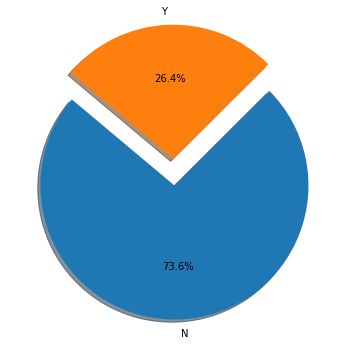

In [18]:
print(df['Fatal'].value_counts())
explode = [0.1 for i in range(len(df['Fatal'].value_counts().index.tolist()))]

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.pie([e for e in df['Fatal'].value_counts()], explode = explode, labels=df['Fatal'].value_counts().index.tolist(), autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### Date

In [19]:
# Date column:

# I'm going to extract 'month' information:
# Months are stored before a dash.
lista_date = [re.findall("(?i)[a-z]+-", str(e)) for e in df['Date']]

lista_date_2 = []
for e in lista_date:
    if len(e)>0:
        lista_date_2.append(e[0][:-1])
    else:
        lista_date_2.append('NaN')

lista_date_2 = [re.sub('Sept', 'Sep', str(e)) for e in lista_date_2]
lista_date_2 = [re.sub('March', 'Mar', str(e)) for e in lista_date_2]
lista_date_2 = [re.sub('Ap$', 'Apr', str(e)) for e in lista_date_2]
lista_date_2 = [re.sub('(?i)mid|Summer|Spanish|Jut', 'NaN', str(e)) for e in lista_date_2]

df['Month'] = lista_date_2
df['Month'].replace({'NaN': np.nan}, inplace=True)
print(set(df.Month))
display(df.head(3))

{'Dec', nan, 'Feb', 'Mar', 'Aug', 'Jul', 'Nov', 'Oct', 'Sep', 'Jun', 'Jan', 'Apr', 'May'}


,Date,Year,Type,Country,Activity,Name,Sex,Age,Fatal,Month
0,18-Sep-16,2016,Unprovoked,USA,Surfing,male,M,16,N,Sep
1,18-Sep-16,2016,Unprovoked,USA,Surfing,Chucky Luciano,M,36,N,Sep
2,18-Sep-16,2016,Unprovoked,USA,Surfing,male,M,43,N,Sep


Jul    635
Aug    579
Sep    523
Jan    500
Jun    473
Dec    417
Oct    411
Apr    407
Mar    401
Nov    397
May    369
Feb    360
Name: Month, dtype: int64


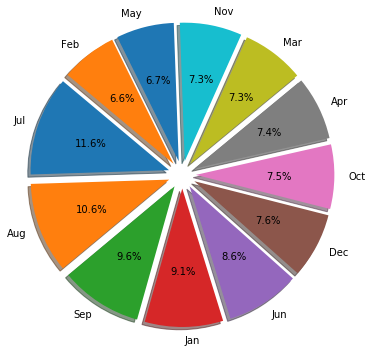

In [20]:
print(df['Month'].value_counts())
explode = [0.1 for i in range(len(df['Month'].value_counts().index.tolist()))]

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.pie([e for e in df['Month'].value_counts()], explode = explode, labels=df['Month'].value_counts().index.tolist(), autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

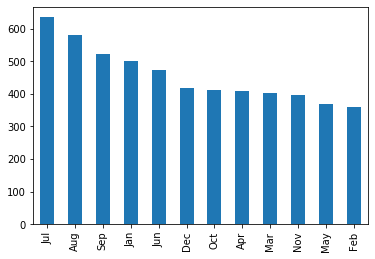

In [21]:
df['Month'].value_counts().plot(kind='bar')

### Year

In [22]:
# Year column:

# Completing 'Year' variable with 'Date' variable ('Date' contains some years that are not collected in 'Year' column):

lista_year = [re.findall("[0-9]{4}", str(e)) for e in df['Date']]

lista_year_2 = []
for e in lista_year:
    if len(e)==1:
        lista_year_2.append(int(e[0]))
    else:
        lista_year_2.append(None)

print(list(df['Year']).count(0), "rows equal 0 before the completion")

for i in range(len(lista_year_2)):
    if lista_year_2[i] != None:
        if df['Year'][i] == 0:
            # df['Year'][i] = lista_year_2[i] # SettingWithCopyWarning: A value is trying to be set on a copy
            # of a slice from a DataFrame
            df.at[i,'Year'] = lista_year_2[i]

print(list(df['Year']).count(0), "rows equal 0 after the completion")


124 rows equal 0 before the completion
33 rows equal 0 after the completion


In [23]:
# Values below 1000 in the Year variable do not seem very reliable. I convert them to NaN values:

setyear = set(df['Year'][df['Year']<1000])
for e in setyear:
    df['Year'].replace({e: np.nan}, inplace=True)

# Because NaN is a float, this forces an array of integers with any missing values to become floating point.
# https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html
# If you need to represent integers with possibly missing values, you can use one of the nullable-integer extension dtypes
# provided by pandas.

# However, I'm going to keep the float type because this is not going to pose any problem in my analysis.
# (there is no need to converti it to int).

print(df.Year.dtypes)

float64


In [24]:
# df["Year"].value_counts().sort_index()
year_values = [int(e) for e in df["Year"].value_counts().sort_index()]
year_labels = df["Year"].value_counts().sort_index().index.tolist()
year_labels_2 = [int(e) for e in year_labels]
# print(year_values)
# print(year_labels_2)

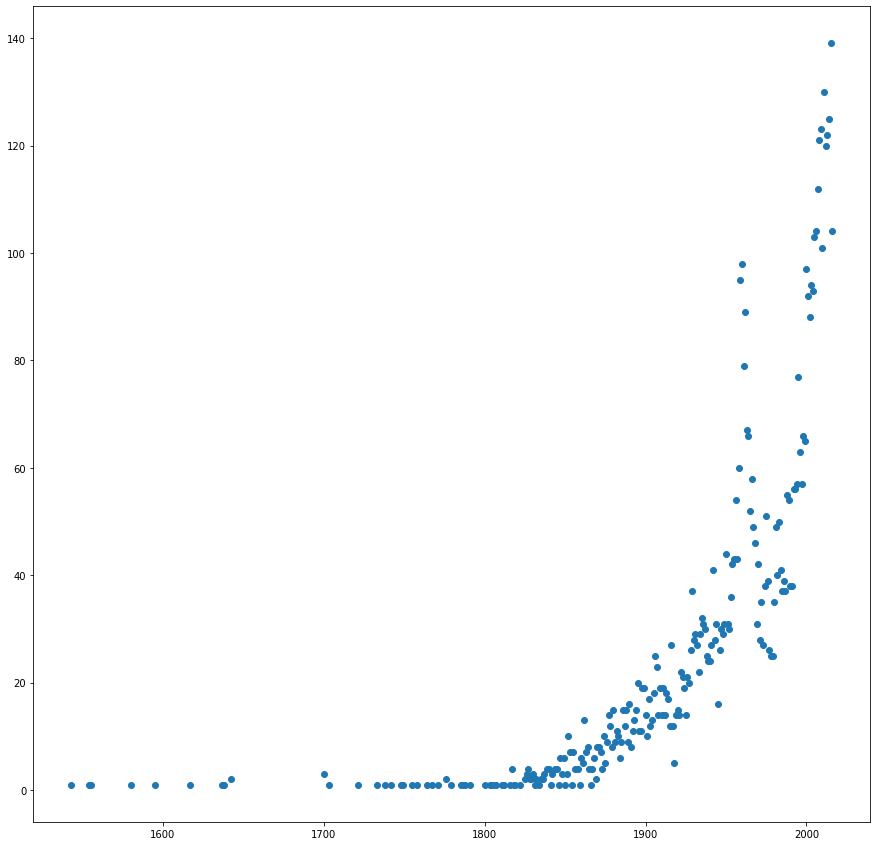

In [25]:
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.scatter(year_labels_2, year_values)

In [26]:
# I won't need 'Date' column anymore:
df = df.drop(['Date'], axis=1)
display(df.head(3))

,Year,Type,Country,Activity,Name,Sex,Age,Fatal,Month
0,2016.0,Unprovoked,USA,Surfing,male,M,16,N,Sep
1,2016.0,Unprovoked,USA,Surfing,Chucky Luciano,M,36,N,Sep
2,2016.0,Unprovoked,USA,Surfing,male,M,43,N,Sep


### Century

In [27]:
# Binning 'Year' to create a new variable: 'Century':

# print(df['Year'].min()) # 1543.0
# print(df['Year'].max()) # 2016.0

year_labels = ['XVI','XVII','XVIII','XIX','XX','XXI']
cutoffs = [1499,1599,1699,1799,1899,1999,2099]
century = pd.cut(df['Year'], cutoffs, labels=year_labels)

df['Century'] = century
display(df.head(3))

,Year,Type,Country,Activity,Name,Sex,Age,Fatal,Month,Century
0,2016.0,Unprovoked,USA,Surfing,male,M,16,N,Sep,XXI
1,2016.0,Unprovoked,USA,Surfing,Chucky Luciano,M,36,N,Sep,XXI
2,2016.0,Unprovoked,USA,Surfing,male,M,43,N,Sep,XXI


XX       3545
XXI      1868
XIX       511
XVIII      22
XVII        5
XVI         5
Name: Century, dtype: int64


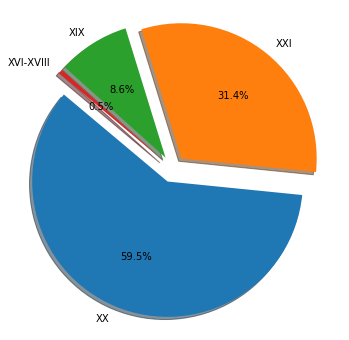

In [28]:
print(df['Century'].value_counts())
century_value_counts = [e for e in df['Century'].value_counts()]
century_value_counts_grouped = [century_value_counts[0],century_value_counts[1],century_value_counts[2],century_value_counts[3]+century_value_counts[4]+century_value_counts[5]]
explode = [0.1 for i in range(len(century_value_counts_grouped))]

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.pie(century_value_counts_grouped, explode=explode, labels=['XX','XXI','XIX','XVI-XVIII'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

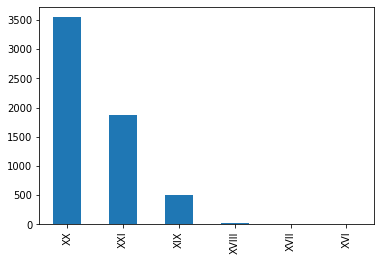

In [29]:
df['Century'].value_counts().plot(kind='bar')

### Activity

In [30]:
# Activity column:

# Looking for -ing verbs:
lista_activity = [re.findall('(?i)[a-z]+ing', str(e)) for e in df['Activity']] 

lista_activity_2 = []
for e in lista_activity:
    if len(e)>0:
        lista_activity_2.append(e[0])
    else:
        lista_activity_2.append('Others')

# lista_activity_2 = [e.capitalize() if e != None else None for e in lista_activity_2]
lista_activity_2 = [e.capitalize() for e in lista_activity_2]

In [31]:
print(set(lista_activity_2))

{'Washing', 'Measuring', 'Crabbing', 'Sing', 'Defecating', 'Taking', 'Cleaning', 'Stamding', 'Feeding', 'Killing', 'Clamming', 'Netting', 'Hunting', 'Paddleskiing', 'Flying', 'Footing', 'Oystering', 'Travelling', 'Restraining', 'Photographing', 'Harassing', 'Murdering', 'Yachting', 'Standing', 'Gigging', 'Pearling', 'Dropping', 'Crossing', 'Splashing', 'Sailing', 'Tagging', 'Removing', 'Waiting', 'Others', 'Chasing', 'Involving', 'Reading', 'Awaiting', 'Paddling', 'Feeling', 'Watching', 'Dynamiting', 'Loading', 'Attaching', 'Rowing', 'Wrangling', 'Lobstering', 'Boarding', 'Filming', 'Boeing', 'Clinging', 'Longling', 'Swimming', 'Bringing', 'Dismantling', 'Lashing', 'Walking', 'Bodysurfing', 'Finning', 'Wakeboarding', 'Thrashing', 'Guarding', 'Drowning', 'Wearing', 'Floating', 'Chumming', 'Pulling', 'Fleeing', 'Leaving', 'Spearing', 'Kayaking', 'Jumping', 'Canoeing', 'Abandoning', 'Resting', 'Setting', 'Pursuing', 'Surfing', 'Cutting', 'Hanging', 'Shelling', 'Morning', 'Landing', 'Scull

In [32]:
# I'm going to add to the "Others" category those activities with an occurrence < 10:
lista_aux = []
for e in set(lista_activity_2):
    lista_aux.append((e, lista_activity_2.count(e)))
lista_aux.sort(key=lambda tup: tup[1], reverse=True)

print([e for e in lista_aux if e[1]> 10])
activities = [e[0] for e in lista_aux if e[1]> 10]

[('Swimming', 1047), ('Surfing', 1013), ('Others', 894), ('Fishing', 687), ('Diving', 509), ('Spearfishing', 395), ('Bathing', 177), ('Wading', 162), ('Standing', 128), ('Boarding', 127), ('Snorkeling', 82), ('Floating', 46), ('Treading', 39), ('Kayaking', 35), ('Skiing', 34), ('Attempting', 30), ('Playing', 25), ('Walking', 24), ('Rowing', 21), ('Sitting', 21), ('Windsurfing', 20), ('Paddling', 16), ('Freediving', 14), ('Sinking', 14), ('Sailing', 13), ('Canoeing', 13), ('Collecting', 12), ('Washing', 11), ('Netting', 11), ('Skindiving', 11)]


In [33]:
lista_activity_3 = ['Others' if e not in activities else e for e in lista_activity_2]
print(set(lista_activity_3))

{'Floating', 'Washing', 'Kayaking', 'Canoeing', 'Netting', 'Surfing', 'Collecting', 'Standing', 'Skiing', 'Sailing', 'Sitting', 'Others', 'Diving', 'Snorkeling', 'Paddling', 'Attempting', 'Fishing', 'Windsurfing', 'Bathing', 'Skindiving', 'Rowing', 'Wading', 'Boarding', 'Swimming', 'Spearfishing', 'Walking', 'Freediving', 'Playing', 'Treading', 'Sinking'}


In [34]:
# Grouping activities by categories:
lista_activity_3 = [re.sub('Boarding|Skiing', 'WaterSkiing', str(e)) for e in lista_activity_3]
lista_activity_3 = [re.sub('Canoeing|Rowing|Kayaking', 'Paddling', str(e)) for e in lista_activity_3]
lista_activity_3 = [re.sub('Bathing|Floating|Treading', 'Swimming', str(e)) for e in lista_activity_3]
lista_activity_3 = [re.sub('Snorkeling|Skindiving', 'Freediving', str(e)) for e in lista_activity_3]
lista_activity_3 = [re.sub('Wading|Walking|Playing|Sitting|Standing','ShoreActivities', str(e)) for e in lista_activity_3]
lista_activity_3 = [re.sub('Netting|Collecting','Fishing', str(e)) for e in lista_activity_3]
lista_activity_3 = [re.sub('Attempting|Washing','Others', str(e)) for e in lista_activity_3]

In [35]:
print(set(lista_activity_3))

{'Surfing', 'Others', 'WaterSkiing', 'Spearfishing', 'Diving', 'Freediving', 'Paddling', 'ShoreActivities', 'Fishing', 'Windsurfing', 'Sinking', 'Sailing', 'Swimming'}


In [36]:
# Looking for other important activities to add (no -ing verbs):

lista_aux_2 = []
for i in range(len(lista_activity_3)):
    if lista_activity_3[i] == 'Others' and df['Activity'].isnull()[i] == False:
        lista_aux_2.append(df['Activity'][i])
    else:
        lista_aux_2.append('Ignore')

lista_aux_2 = [e.capitalize() for e in lista_aux_2]

lista_aux_3 = []
for e in set(lista_aux_2):
    lista_aux_3.append((e, lista_aux_2.count(e)))
lista_aux_3.sort(key=lambda tup: tup[1], reverse=True)


In [37]:
addingactivities = [e[0] for e in lista_aux_3 if e[1]> 10]
print([e for e in lista_aux_3 if e[1]> 10])

[('Ignore', 5223), ('Fell overboard', 21), ('Sea disaster', 14)]


In [38]:
for i in range(len(df['Activity'])):
    if df['Activity'][i] == 'Fell overboard':
        lista_activity_3[i] = 'Sailing'
    if df['Activity'][i] == 'Sea disaster':
        lista_activity_3[i] = 'Sinking'

In [39]:
print(set(lista_activity_3))

{'Surfing', 'Others', 'WaterSkiing', 'Spearfishing', 'Diving', 'Freediving', 'Paddling', 'ShoreActivities', 'Fishing', 'Windsurfing', 'Sinking', 'Sailing', 'Swimming'}


In [40]:
print(df['Activity'].isnull().sum())

for i in range(len(lista_activity_3)):
    if lista_activity_3[i] == 'Others' and df['Activity'].isnull()[i] == True:
        lista_activity_3[i] = np.nan

print(set(lista_activity_3))

527
{nan, 'Surfing', 'Others', 'WaterSkiing', 'Spearfishing', 'Diving', 'Freediving', 'Paddling', 'ShoreActivities', 'Fishing', 'Windsurfing', 'Sinking', 'Sailing', 'Swimming'}


In [41]:
df['Activities'] = lista_activity_3
print(df['Activities'].isnull().sum())
df['Activities'].value_counts()

527


Swimming           1309
Surfing            1013
Others              740
Fishing             710
Diving              509
Spearfishing        395
ShoreActivities     360
WaterSkiing         161
Freediving          107
Paddling             85
Sailing              34
Sinking              22
Windsurfing          20
Name: Activities, dtype: int64

In [42]:
explode = [0.1 for i in range(len(df['Activities'].value_counts().index.tolist()))]
explode = explode[0:11]
activity_values = [e for e in df['Activities'].value_counts()]
activity_values_2 = activity_values[0:10]
activity_values_2.append(activity_values[10]+activity_values[11]+activity_values[12])
activity_labels = df['Activities'].value_counts().index.tolist()
activity_labels_2 = activity_labels[0:10]
activity_labels_2.append('Sailing + Sinking + Windsurfing')

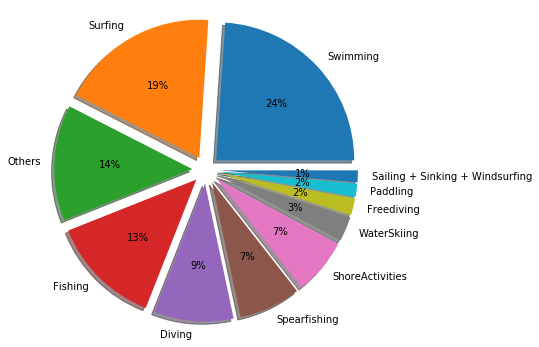

In [43]:
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.pie(activity_values_2, explode = explode, labels= activity_labels_2, autopct='%1.0f%%', shadow=True)
plt.axis('equal')
plt.show()

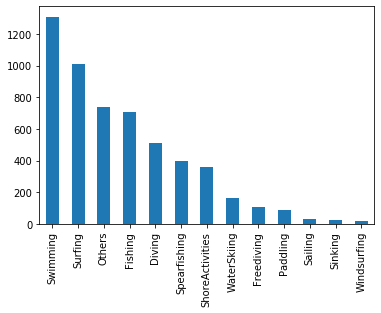

In [44]:
df['Activities'].value_counts().plot(kind='bar')

In [45]:
# I won't need 'Activity' column anymore:
df = df.drop(['Activity'], axis=1)
display(df.head(3))

,Year,Type,Country,Name,Sex,Age,Fatal,Month,Century,Activities
0,2016.0,Unprovoked,USA,male,M,16,N,Sep,XXI,Surfing
1,2016.0,Unprovoked,USA,Chucky Luciano,M,36,N,Sep,XXI,Surfing
2,2016.0,Unprovoked,USA,male,M,43,N,Sep,XXI,Surfing


### Sex

In [46]:
# Sex column:

print(set(df['Sex']))
df['Sex'] = [re.sub('M\s', 'M', str(e)) for e in df['Sex']]
df['Sex'] = [re.sub('N|\.|lli', 'nan', str(e)) for e in df['Sex']]
print(set(df['Sex']))
df['Sex'].replace({'nan': np.nan}, inplace=True)
print(set(df['Sex']))


{nan, 'N', '.', 'lli', 'F', 'M', 'M '}
{'nan', 'F', 'M'}
{nan, 'F', 'M'}


In [47]:
# Name column:

# The 'Name' column contain some data about the 'Sex' of the victim that are not properly contained in the 'Sex' column.
# I'm going to subtract this information to add it to the 'Sex' column:

female = [re.findall('(?i)female', str(e)) for e in df['Name']]
male = [re.findall('(?i)male', str(e)) for e in df['Name']]

lista_male = [e[0] if len(e)>0 else 'Ignore' for e in male]
lista_female = [e[0] if len(e)>0 else 'Ignore' for e in female]   
lista_male_new = [e if e != 'Male' else 'male' for e in lista_male]
print(set(lista_male_new))
print(set(lista_female))


{'Ignore', 'male'}
{'Ignore', 'female'}


In [48]:
print(df['Sex'].isnull().sum(), "rows equal Nan before the completion")

for i in range(len(lista_male_new)):
    if lista_male_new[i] == 'male' and df['Sex'].isnull()[i] == True:
            df.at[i,'Sex'] = 'M'
            
for i in range(len(lista_female)):
    if lista_female[i] == 'female' and df['Sex'].isnull()[i] == True:
            df.at[i,'Sex'] = 'F'

print(df['Sex'].isnull().sum(), "rows equal Nan after the completion")

570 rows equal Nan before the completion
559 rows equal Nan after the completion


In [49]:
df['Sex'].value_counts()

M    4848
F     585
Name: Sex, dtype: int64

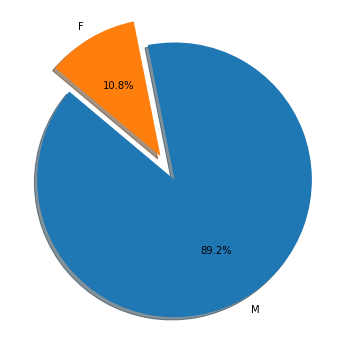

In [50]:
explode = [0.1 for i in range(len(df['Sex'].value_counts().index.tolist()))]

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.pie([e for e in df['Sex'].value_counts()], explode = explode, labels= df['Sex'].value_counts().index.tolist(), autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [51]:
df = df.drop(['Name'], axis=1)

### Type

In [52]:
# Type column:

print(set(df['Type']))

df['Type'].replace({'Boating': 'Unprovoked'}, inplace=True)
df['Type'].replace({'Boat': 'Unprovoked'}, inplace=True)
df['Type'].replace({'Sea Disaster': 'Unprovoked'}, inplace=True)
df['Type'].replace({'Invalid': np.nan}, inplace=True)

print(set(df['Type']))
df['Type'].value_counts()

{'Unprovoked', 'Provoked', 'Boat', 'Sea Disaster', 'Boating', 'Invalid'}
{'Unprovoked', nan, 'Provoked'}


Unprovoked    4916
Provoked       557
Name: Type, dtype: int64

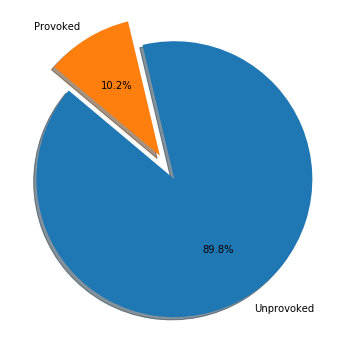

In [53]:
explode = [0.1 for i in range(len(df['Type'].value_counts().index.tolist()))]

fig = plt.gcf()
fig.set_size_inches(6,6)
plt.pie([e for e in df['Type'].value_counts()], explode = explode, labels= df['Type'].value_counts().index.tolist(), autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

### Age

In [54]:
# 'Age' Column

lista_age = [re.findall('[0-9]{2}', str(e)) for e in df['Age']]

lista_age_2 = []
for e in lista_age:
    if len(e)>0:
        aux = [int(value) for value in e]
        lista_age_2.append(int(sum(aux)/len(aux)))
    else:
        lista_age_2.append(np.nan)

print(set(lista_age_2))


{nan, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 81, 84, 86, 87}


In [55]:
df = df.drop(['Age'], axis=1)
df['Age'] = lista_age_2
display(df.head(3))

,Year,Type,Country,Sex,Fatal,Month,Century,Activities,Age
0,2016.0,Unprovoked,USA,M,N,Sep,XXI,Surfing,16.0
1,2016.0,Unprovoked,USA,M,N,Sep,XXI,Surfing,36.0
2,2016.0,Unprovoked,USA,M,N,Sep,XXI,Surfing,43.0


In [56]:
# df["Age"].value_counts().sort_index()
Age_values = [int(e) for e in df["Age"].value_counts().sort_index()]
Age_labels = df["Age"].value_counts().sort_index().index.tolist()
Age_labels_2 = [int(e) for e in Age_labels]
print(Age_values)
print(Age_labels_2)

[54, 37, 72, 92, 98, 136, 135, 149, 146, 140, 145, 117, 113, 81, 104, 101, 83, 80, 78, 77, 83, 54, 65, 42, 45, 66, 41, 37, 48, 37, 54, 34, 36, 43, 29, 32, 25, 28, 25, 27, 35, 19, 34, 13, 14, 20, 9, 14, 12, 11, 16, 11, 8, 9, 4, 4, 3, 1, 6, 8, 6, 3, 1, 1, 2, 2, 3, 2, 1, 1, 1, 1]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 77, 78, 81, 84, 86, 87]


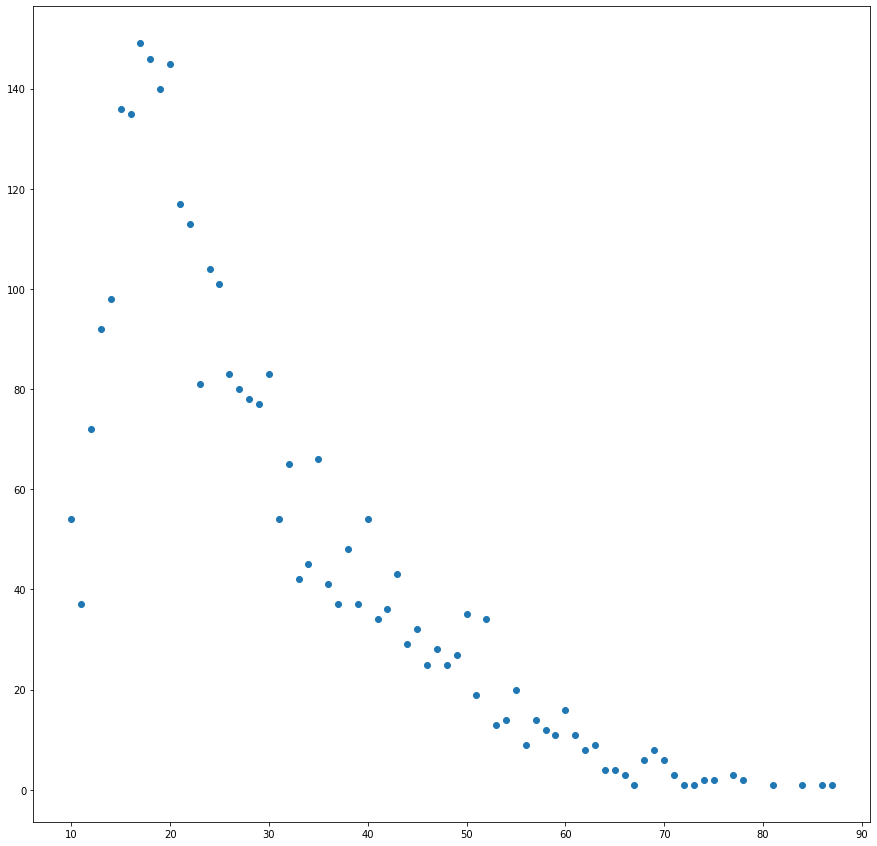

In [57]:
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.scatter(Age_labels_2, Age_values)

### Country

In [58]:
# 'Country' column:

# print(df['Country'].value_counts())

# I'm going to create an "Others" category to englobe countries with a value_count < 50:

selected_countries = df['Country'].value_counts().index.tolist()[0:13]

Countries = [e.title() if e in selected_countries else 'Others' for e in df['Country']]
print(set(Countries))


{'Brazil', 'Others', 'Reunion', 'Papua New Guinea', 'Mexico', 'Italy', 'South Africa', 'New Caledonia', 'New Zealand', 'Philippines', 'Bahamas', 'Fiji', 'Usa', 'Australia'}


In [59]:
df = df.drop(['Country'], axis=1)
df['Country'] = Countries
display(df.head(3))

,Year,Type,Sex,Fatal,Month,Century,Activities,Age,Country
0,2016.0,Unprovoked,M,N,Sep,XXI,Surfing,16.0,Usa
1,2016.0,Unprovoked,M,N,Sep,XXI,Surfing,36.0,Usa
2,2016.0,Unprovoked,M,N,Sep,XXI,Surfing,43.0,Usa


In [60]:
df['Country'].replace({'Usa': 'USA'}, inplace=True)
display(df.head(3))
print(set(df['Country']))

,Year,Type,Sex,Fatal,Month,Century,Activities,Age,Country
0,2016.0,Unprovoked,M,N,Sep,XXI,Surfing,16.0,USA
1,2016.0,Unprovoked,M,N,Sep,XXI,Surfing,36.0,USA
2,2016.0,Unprovoked,M,N,Sep,XXI,Surfing,43.0,USA


{'Brazil', 'Others', 'USA', 'Reunion', 'Papua New Guinea', 'Mexico', 'Italy', 'South Africa', 'New Caledonia', 'New Zealand', 'Philippines', 'Bahamas', 'Fiji', 'Australia'}


In [61]:
explode = [0.1 for i in range(len(df['Country'].value_counts().index.tolist()))]
explode = explode[0:5]
country_values = [e for e in df['Country'].value_counts()]
country_values_2 = country_values[0:5]
country_values_2[2] += sum(country_values[5:])
country_labels = df['Country'].value_counts().index.tolist()
country_labels = country_labels[0:5]

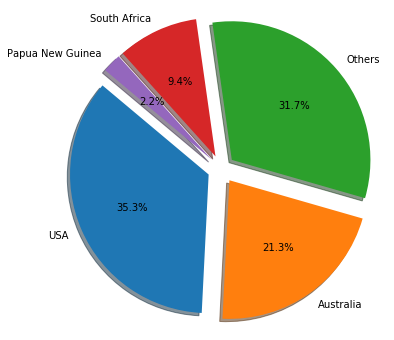

In [62]:
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.pie(country_values_2, explode = explode, labels= country_labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

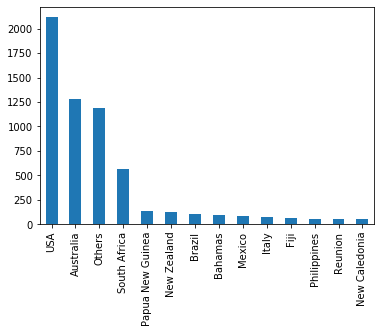

In [63]:
df['Country'].value_counts().plot(kind='bar')

### Case Number

In [64]:
# Creating a correct Case Number column:
df['num'] = [e for e in range(len(df['Year']))]

In [65]:
# Function

# def Case_Number(e):
    # return "{}_{}".format(e['num'],e['Country'])


In [66]:
df2 = df[['num','Country']]
tr = df2.apply(Case_Number, axis=1) # tr = df2.apply(Case_Number, axis=1, result_type="broadcast")

In [67]:
df['CaseNumber'] = tr
display(df.head(3))

,Year,Type,Sex,Fatal,Month,Century,Activities,Age,Country,num,CaseNumber
0,2016.0,Unprovoked,M,N,Sep,XXI,Surfing,16.0,USA,0,0_USA
1,2016.0,Unprovoked,M,N,Sep,XXI,Surfing,36.0,USA,1,1_USA
2,2016.0,Unprovoked,M,N,Sep,XXI,Surfing,43.0,USA,2,2_USA


## 🦈 Exporting data:

In [68]:
cols = ['CaseNumber','Country','Century','Year','Month','Type','Activities','Fatal','Sex','Age']
df = df[cols]
display(df.head(3))

,CaseNumber,Country,Century,Year,Month,Type,Activities,Fatal,Sex,Age
0,0_USA,USA,XXI,2016.0,Sep,Unprovoked,Surfing,N,M,16.0
1,1_USA,USA,XXI,2016.0,Sep,Unprovoked,Surfing,N,M,36.0
2,2_USA,USA,XXI,2016.0,Sep,Unprovoked,Surfing,N,M,43.0


In [69]:
# Exporting a clean CSV version of data using Pandas:
df.to_csv('./Output/cleanedDF.csv')

# The end